In [55]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from numpy import sqrt
import random


# I) Stations de Radio :

Nous avons pour objectif de déterminer le nombre minimum de fréquences nécessaires pour des stations de radio, afin d'éviter des interférences dues à des stations trop proches. La proximité est définie comme une distance inférieure à 3 unités.

Pour résoudre ce problème, nous modélisons les stations de radio comme un graphe où :



*   Chaque station est un sommets du graphe.



* Une arête est ajoutée entre deux sommets si la distance entre ces stations est inférieure à 3.

*   Nous allons ensuite utiliser un algorithme de coloration de graphe pour attribuer des fréquences différentes à chaque station en évitant les conflits.






**Coloration du graphe avec l'algorithme de Welsh et Powell**

Pour éviter les conflits de fréquence, nous appliquons l'algorithme de Welsh et Powell. Cet algorithme trie les sommets par degré décroissant et leur attribue des couleurs (fréquences) de manière à ce que les sommets adjacents ne partagent pas la même couleur.

Nombre minimum de fréquences nécessaires : 3


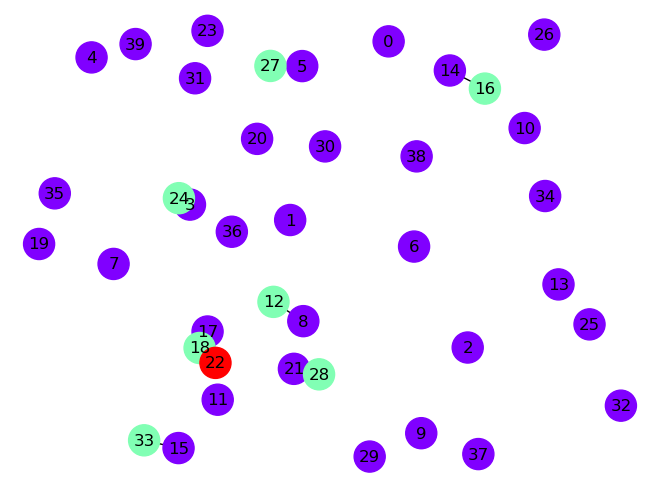

In [56]:

# 1. Fonction pour lire les coordonnées des stations à partir des fichiers CSV
def load_coordinates(path_x, path_y):
    X = np.loadtxt(path_x, delimiter=',')
    Y = np.loadtxt(path_y, delimiter=',')
    return X, Y

# 2. Fonction pour calculer la distance entre deux stations
def distance(x1, y1, x2, y2):
    return sqrt((x1 - x2)**2 + (y1 - y2)**2)

# 3. Fonction pour construire le graphe avec des arêtes entre les stations proches
def build_graph(X, Y, threshold=3):
    G = nx.Graph()
    num_stations = len(X)

    # Ajout des sommets (stations)
    G.add_nodes_from(range(num_stations))

    # Ajout des arêtes (stations trop proches)
    for i in range(num_stations):
        for j in range(i + 1, num_stations):
            if distance(X[i], Y[i], X[j], Y[j]) < threshold:
                G.add_edge(i, j)

    return G

# 4. Fonction pour afficher le graphe coloré et le nombre de fréquences nécessaires
def display_graph(G, X, Y, coloring):
    num_frequencies = max(coloring.values()) + 1
    print(f"Nombre minimum de fréquences nécessaires : {num_frequencies}")

    # Visualisation du graphe colorié
    colors = [coloring[node] for node in G.nodes()]
    pos = {i: (X[i], Y[i]) for i in range(len(X))}  # Position des stations pour affichage
    nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.rainbow, node_size=500)
    plt.show()

# Main - Exécution du programme

# 1. Charger les coordonnées des fichiers CSV
path_x = 'X.csv'
path_y = 'Y.csv'
X, Y = load_coordinates(path_x, path_y)

# 2. Construire le graphe à partir des coordonnées
G = build_graph(X, Y, threshold=3)

# 3. Appliquer l'algorithme de Welsh et Powell pour la coloration du graphe
coloring = nx.coloring.greedy_color(G, strategy='largest_first')

# 4. Afficher le graphe et le résultat
display_graph(G, X, Y, coloring)


# II ) Chemin:

**Construction de la matrice d'adjacence:**

Nous créons une matrice d'adjacence à partir de la matrice de poids, où chaque entrée vaut 1 si une arête existe entre deux sommets, sinon 0.


In [57]:


M = np.loadtxt('M.csv', delimiter=',')
print("Matrice de poids M:")
print(M)

#Création de la matrice d'adjacence
A = (M > 0).astype(int)  
print("\nMatrice d'adjacence A:")
print(A)


Matrice de poids M:
[[ 0. 21.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0. 17.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0. 22. 12.  0. 24.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  6.  0. 21.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0. 12. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0. 14. 23.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 12.  0.  0.  0.  0.  0.  8.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  0.  9.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 27. 19.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 21. 11.  0. 15.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 30.  0.  0. 24.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

**Fonction Bellman récursive:**

In [58]:
def bellman(matrix, start, goal, summit):
    point = start
    summit=summit.copy()
    summit[start] = True
    
    #Renvoie 0 si on a atteint l'objectif
    if point == goal:
        return 0, [point]  
    
    min_weight = float('inf')
    min_path = []
    
    for i in range(len(matrix[point])):
        weight_i = matrix[point][i]
        # On vérifie que l'on a pas déjà visité le noeud
        if weight_i > 0 and not summit[i]:  
            weight_bellman, path_bellman = bellman(matrix, i, goal, summit)
            weight = weight_i + weight_bellman
            
            if weight < min_weight:
                min_weight = weight
                min_path = path_bellman.copy()
    
    #Ajouter le nouveau point au parcourt

    if min_path:
        min_path.insert(0, point)  
    else:
        return float('inf'), []  
    
    return min_weight, min_path


**Calcul du chemin minimal :**

On applique la fonction bellman que l'on vient de définir afin de calculer le chemin minimal

In [59]:
summit = [False for _ in range(len(M))]

start_node = 0 
goal_node = len(M) - 1  
min_weight, min_path = bellman(M, start_node, goal_node, summit.copy())

print(f'Cacul du chemin minimum entre les points {start_node} et {goal_node}')
print('Point Minimal:', min_weight)
print('Chemin:', ' -> '.join(map(str, min_path)))

Cacul du chemin minimum entre les points 0 et 19
Point Minimal: 87.0
Chemin: 0 -> 5 -> 6 -> 14 -> 15 -> 16 -> 19


In [60]:
def plot_bellman(M, min_path):
    # Affichage du graphe avec NetworkX
    G = nx.DiGraph()

    # Ajouter les arêtes pondérées au graphe
    for i in range(len(M)):
        for j in range(len(M[i])):
            if M[i][j] > 0:
                G.add_edge(i, j, weight=M[i][j])

    # Positions des nœuds
    pos = nx.kamada_kawai_layout(G)

    # Dessiner les nœuds et arêtes
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')

    # Dessiner les poids des arêtes
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Mettre en évidence le chemin trouvé
    if min_path:
        # Créer une liste d'arêtes correspondant au chemin trouvé
        path_edges = [(min_path[i], min_path[i + 1]) for i in range(len(min_path) - 1)]
        
        # Dessiner les arêtes du chemin trouvé en rouge
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    # Afficher le graphe
    plt.title('Graphe avec chemin emprunté')
    plt.show()

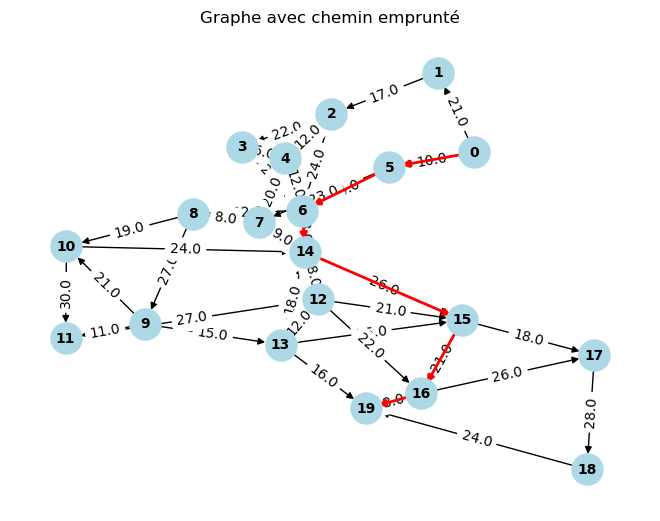

In [61]:
plot_bellman(M, min_path)

Test de l'algortithme sur un échantillon aléatoire de sommets 

Cacul du chemin minimum entre les points 3 et 3
Point Minimal: 0
Chemin: 3


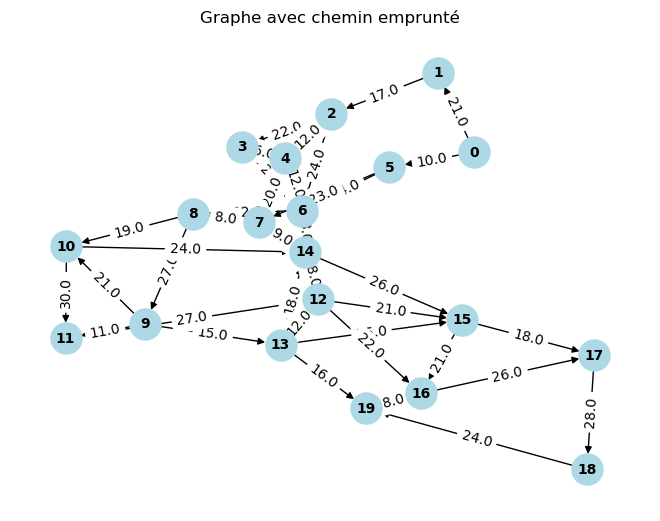

Cacul du chemin minimum entre les points 11 et 18
Point Minimal: 94.0
Chemin: 11 -> 12 -> 15 -> 17 -> 18


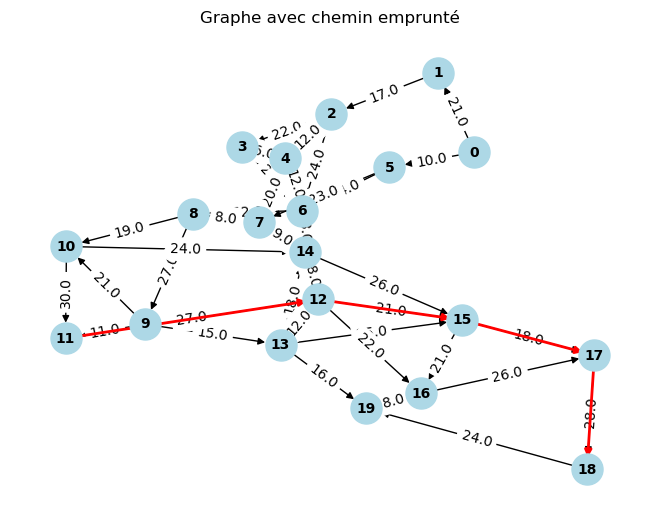

Cacul du chemin minimum entre les points 3 et 5
Point Minimal: inf
Chemin: 


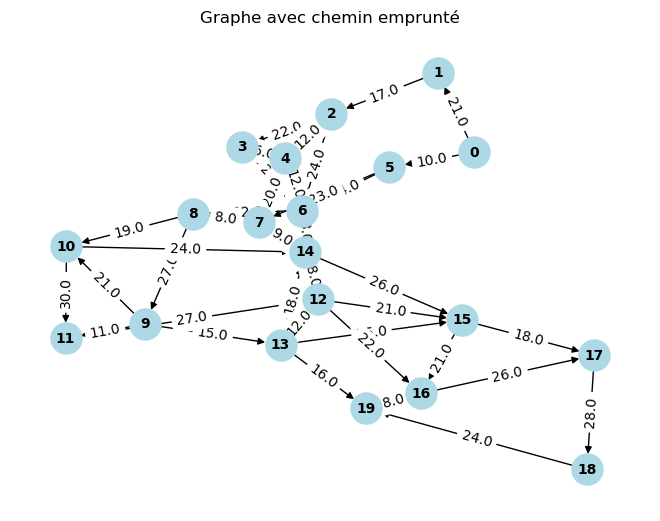

Cacul du chemin minimum entre les points 10 et 16
Point Minimal: 71.0
Chemin: 10 -> 14 -> 15 -> 16


/tmp/ipykernel_62128/178490639.py:27: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)


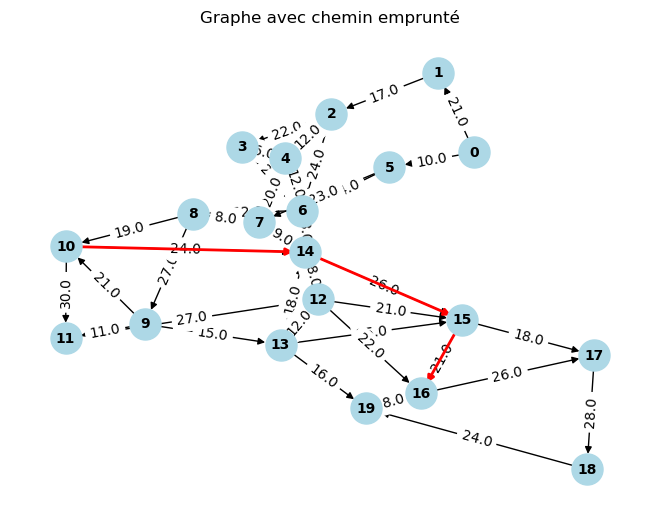

Cacul du chemin minimum entre les points 1 et 11
Point Minimal: 91.0
Chemin: 1 -> 2 -> 4 -> 6 -> 8 -> 9 -> 11


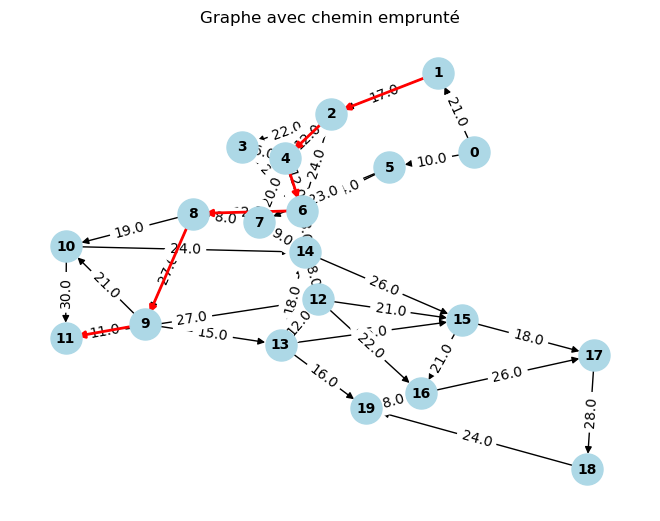

In [62]:
liste_path = []

for i in range(5):
    summit = [False for _ in range(len(M))]

    start_node = random.randint(0, len(M) - 1  )
    goal_node = random.randint(start_node, len(M) - 1  )
    min_weight, min_path = bellman(M, start_node, goal_node, summit.copy())

    print(f'Cacul du chemin minimum entre les points {start_node} et {goal_node}')
    print('Point Minimal:', min_weight)
    print('Chemin:', ' -> '.join(map(str, min_path)))

    plot_bellman(M, min_path)

    

# III)  Flot :

Nous allons déterminer le flot maximal d'un réseau représenté par une matrice, où chaque élément indique le flot maximal possible à travers une arête. Nous allons utiliser l'algorithme de flot maximal de NetworkX pour effectuer ce calcul.

***Calcul du flot maximal***

Nous définissons les sommets source et puits, puis utilisons la fonction maximum_flow de NetworkX pour calculer le flot maximal.

In [63]:


def build_graph_from_matrix(M):
    G = nx.DiGraph() 
    num_vertices = len(M)

    for i in range(num_vertices):
        for j in range(num_vertices):
            if M[i][j] > 0: 
                G.add_edge(i, j, capacity=M[i][j])

    return G

# Construire le graphe à partir de la matrice 
G = build_graph_from_matrix(M)


source = 0  
sink = len(M) - 1  

# 2. Calculer le flot maximal avec NetworkX
flow_value, flow_dict = nx.maximum_flow(G, source, sink)

# 3. Afficher le résultat
print(f"Flot maximal de la source {source} au puits {sink} : {flow_value}")
print("Détail du flot par arête :")
for u in flow_dict:
    for v in flow_dict[u]:
        if flow_dict[u][v] > 0:  # Afficher uniquement les arêtes avec du flot
            print(f"Flot de {u} à {v} : {flow_dict[u][v]}")


Flot maximal de la source 0 au puits 19 : 27.0
Détail du flot par arête :
Flot de 0 à 1 : 17.0
Flot de 0 à 5 : 10.0
Flot de 1 à 2 : 17.0
Flot de 5 à 6 : 3.0
Flot de 5 à 7 : 7.0
Flot de 2 à 6 : 17.0
Flot de 6 à 8 : 12.0
Flot de 6 à 14 : 8.0
Flot de 7 à 8 : 3.0
Flot de 7 à 14 : 4.0
Flot de 8 à 9 : 15.0
Flot de 14 à 15 : 12.0
Flot de 9 à 13 : 15.0
Flot de 13 à 19 : 15.0
Flot de 15 à 16 : 8.0
Flot de 15 à 17 : 4.0
Flot de 16 à 19 : 8.0
Flot de 17 à 18 : 4.0
Flot de 18 à 19 : 4.0


# IV)  Planning :


### Modélisation du Problème

#### 1. **Graphe et Sommets**

Nous allons construire un graphe biparti où :

- **Sommets de gauche (source)** :
  - Une source fictive pour représenter les intervenants.
  
- **Sommets de droite (cibles)** :
  - Groupes d'étudiants pour les cours de Probabilités (P) et Analyse (A).
  - Chaque groupe est associé à ses créneaux horaires.

#### 2. **Arêtes et Capacités**

Les arêtes représenteront les affectations possibles entre les intervenants et les groupes, en tenant compte des compétences des intervenants :

- **Intervenants spécialisés en Probabilités** :
  - C.B., S.V., O.D., G.L., C.H., R.G. peuvent enseigner aux groupes A et B.
  
- **Intervenants spécialisés en Analyse** :
  - K.D., V.T., E.M., M.B., E.K. peuvent enseigner aux groupes C et D.
  
- **Intervenants spécialisés en Analyse et Probabilités** :
  - P.M. et A.S. peuvent enseigner à tous les groupes.

#### 3. **Modèle de Flot**

- La **source** aura des arêtes vers chaque intervenant avec une capacité de 1 (chacun peut enseigner à un groupe).
- Chaque intervenant a des arêtes vers les groupes qu'il peut enseigner, également avec une capacité de 1.
- Les groupes d'étudiants ont des arêtes vers un **puits** (sink) avec une capacité de 1 (chaque groupe doit recevoir un enseignant).

### 4. **Construction du Graphe**


In [64]:
import networkx as nx

# Définition des groupes et leurs horaires avec le nombre de points à créer
groupes_horaires = [
    ("jeudi 8h-10h", "Probabilités", 4),
    ("jeudi 8h-10h", "Analyse", 2),
    ("jeudi 10h-12h", "Analyse", 4),
    ("jeudi 10h-12h", "Probabilités", 4),
    ("vendredi 8h-10h", "Probabilités", 4),
    ("vendredi 8h-10h", "Analyse", 2),
    ("vendredi 13h-15h", "Analyse", 4),
    ("vendredi 13h-15h", "Probabilités", 4)
]

# Liste des intervenants par compétence
intervenants_probabilites = ["C.B.", "S.V.", "O.D.", "G.L.", "C.H.", "R.G."]
intervenants_analyse = ["K.D.", "V.T.", "E.M.", "M.B.", "E.K."]
intervenants_analyse_probabilites = ["P.M.", "A.S."]  # Intervenants qui peuvent faire les deux

# Création du graphe
G = nx.DiGraph()  # Utiliser un graphe orienté pour gérer les flots

# Dictionnaire pour stocker les nœuds par créneau horaire
creneau_nodes = {}

# Création des nœuds pour chaque groupe et créneau
node_id = 0
for (creneau, matiere, num_points) in groupes_horaires:
    # Créer les nœuds pour chaque groupe dans le créneau
    for i in range(num_points):
        node_name = f"{creneau}_{matiere}_{i+1}"
        G.add_node(node_name, type="groupe", creneau=creneau, matiere=matiere)
        if creneau not in creneau_nodes:
            creneau_nodes[creneau] = []
        creneau_nodes[creneau].append(node_name)

# Ajouter les nœuds pour les intervenants
for prof in intervenants_probabilites:
    G.add_node(prof, type="intervenant", matiere="Probabilités")

for prof in intervenants_analyse:
    G.add_node(prof, type="intervenant", matiere="Analyse")

for prof in intervenants_analyse_probabilites:
    G.add_node(prof, type="intervenant", matiere="Analyse et Probabilités")

# Connecter les intervenants aux groupes compatibles par créneau et matière
for (creneau, matiere, num_points) in groupes_horaires:
    for i in range(num_points):
        node_name = f"{creneau}_{matiere}_{i+1}"
        if matiere == "Probabilités":
            # Connecter les intervenants en Probabilités
            for prof in intervenants_probabilites:
                G.add_edge(prof, node_name, capacity=1)  # Capacité = 1 (un prof par créneau)
            # Connecter les intervenants qui peuvent faire les deux
            for prof in intervenants_analyse_probabilites:
                G.add_edge(prof, node_name, capacity=1)
        elif matiere == "Analyse":
            # Connecter les intervenants en Analyse
            for prof in intervenants_analyse:
                G.add_edge(prof, node_name, capacity=1)
            # Connecter les intervenants qui peuvent faire les deux
            for prof in intervenants_analyse_probabilites:
                G.add_edge(prof, node_name, capacity=1)

# Définir le nœud source et le nœud puits pour le problème de flot maximal
source = "source"
sink = "sink"

# Ajouter des arêtes du nœud source aux intervenants avec une capacité de 1 (chaque intervenant peut gérer 1 cours)
for prof in intervenants_probabilites + intervenants_analyse + intervenants_analyse_probabilites:
    G.add_edge(source, prof, capacity=len(groupes_horaires))  # Un prof peut être connecté à plusieurs créneaux

# Ajouter des arêtes des groupes au nœud puits (chaque groupe doit être affecté)
for (creneau, matiere, num_points) in groupes_horaires:
    for i in range(num_points):
        node_name = f"{creneau}_{matiere}_{i+1}"
        G.add_edge(node_name, sink, capacity=1)

# Calculer le flot maximal
flow_value, flow_dict = nx.maximum_flow(G, source, sink)

# Résultat du flot maximal
print(f"Flot maximal : {flow_value}")

# Vérification que tous les créneaux sont affectés
total_creaneaux = sum([num_points for (_, _, num_points) in groupes_horaires])
if flow_value < total_creaneaux:
    print("Il n'y a pas assez d'intervenants pour couvrir tous les créneaux.")
else:
    print("Tous les créneaux ont été couverts.")

# Extraire les attributions
attributions = {}
for prof in intervenants_probabilites + intervenants_analyse + intervenants_analyse_probabilites:
    for groupe, flow in flow_dict[prof].items():
        if flow > 0:  # Si le flot est positif, cela signifie que le professeur est affecté à ce groupe
            if prof not in attributions:
                attributions[prof] = []
            # Extraire le créneau et la matière à partir du nom du groupe
            creneau, matiere, _ = groupe.split("_")
            attributions[prof].append((creneau, matiere))

# Affichage des attributions
for prof, creneaux in attributions.items():
    print(f"Professeur {prof} est affecté aux créneaux suivants :")
    for creneau, matiere in creneaux:
        print(f"  - {creneau} pour {matiere}")


Flot maximal : 28
Tous les créneaux ont été couverts.
Professeur C.B. est affecté aux créneaux suivants :
  - jeudi 8h-10h pour Probabilités
  - vendredi 13h-15h pour Probabilités
Professeur S.V. est affecté aux créneaux suivants :
  - jeudi 8h-10h pour Probabilités
  - jeudi 8h-10h pour Probabilités
Professeur O.D. est affecté aux créneaux suivants :
  - jeudi 10h-12h pour Probabilités
Professeur G.L. est affecté aux créneaux suivants :
  - jeudi 10h-12h pour Probabilités
Professeur C.H. est affecté aux créneaux suivants :
  - jeudi 8h-10h pour Probabilités
  - vendredi 13h-15h pour Probabilités
Professeur R.G. est affecté aux créneaux suivants :
  - jeudi 10h-12h pour Probabilités
  - jeudi 10h-12h pour Probabilités
  - vendredi 8h-10h pour Probabilités
  - vendredi 13h-15h pour Probabilités
Professeur K.D. est affecté aux créneaux suivants :
  - jeudi 10h-12h pour Analyse
Professeur V.T. est affecté aux créneaux suivants :
  - jeudi 8h-10h pour Analyse
  - jeudi 10h-12h pour Analyse

Exemple de solution manuelle

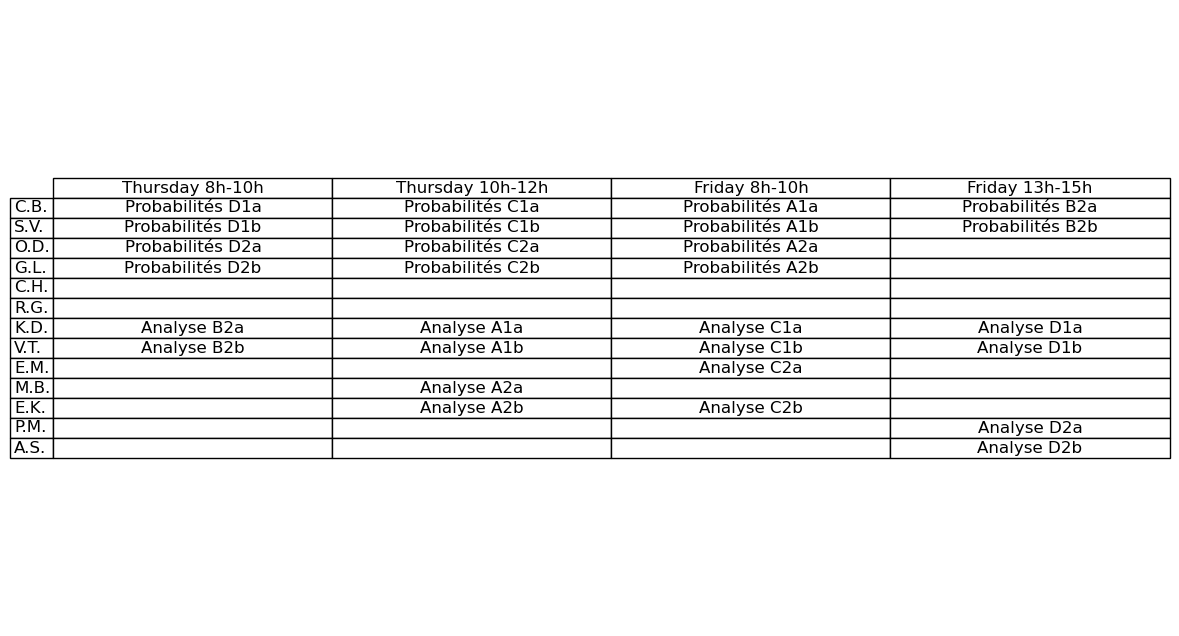

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a dictionary for the course assignments
assignments = {
    'Thursday 8h-10h': {
        'C.B.': 'Probabilités D1a',
        'S.V.': 'Probabilités D1b',
        'O.D.': 'Probabilités D2a',
        'G.L.': 'Probabilités D2b',
        'C.H.': '',
        'R.G.': '',
        'K.D.': 'Analyse B2a',
        'V.T.': 'Analyse B2b',
        'E.M.': '',
        'M.B.': '',
        'E.K.': '',
        'P.M.': '',
        'A.S.': ''
    },
    'Thursday 10h-12h': {
        'C.B.': 'Probabilités C1a',
        'S.V.': 'Probabilités C1b',
        'O.D.': 'Probabilités C2a',
        'G.L.': 'Probabilités C2b',
        'C.H.': '',
        'R.G.': '',
        'K.D.': 'Analyse A1a',
        'V.T.': 'Analyse A1b',
        'E.M.': '',
        'M.B.': 'Analyse A2a',
        'E.K.': 'Analyse A2b',
        'P.M.': '',
        'A.S.': ''
    },
    'Friday 8h-10h': {
        'C.B.': 'Probabilités A1a',
        'S.V.': 'Probabilités A1b',
        'O.D.': 'Probabilités A2a',
        'G.L.': 'Probabilités A2b',
        'C.H.': '',
        'R.G.': '',
        'K.D.': 'Analyse C1a',
        'V.T.': 'Analyse C1b',
        'E.M.': 'Analyse C2a',
        'M.B.': '',
        'E.K.': 'Analyse C2b',
        'P.M.': '',
        'A.S.': ''
    },
    'Friday 13h-15h': {
        'C.B.': 'Probabilités B2a',
        'S.V.': 'Probabilités B2b',
        'O.D.': '',
        'G.L.': '',
        'C.H.': '',
        'R.G.': '',
        'K.D.': 'Analyse D1a',
        'V.T.': 'Analyse D1b',
        'E.M.': '',
        'M.B.': '',
        'E.K.': '',
        'P.M.': 'Analyse D2a',
        'A.S.': 'Analyse D2b'
    }
}

# Convert the dictionary to a DataFrame for easy display
df = pd.DataFrame(assignments)

# Plot the DataFrame as a table
fig, ax = plt.subplots(figsize=(12, 8))  # Set the figure size
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, cellLoc='center', loc='center')

# Set the font size of the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Show the plot
plt.show()


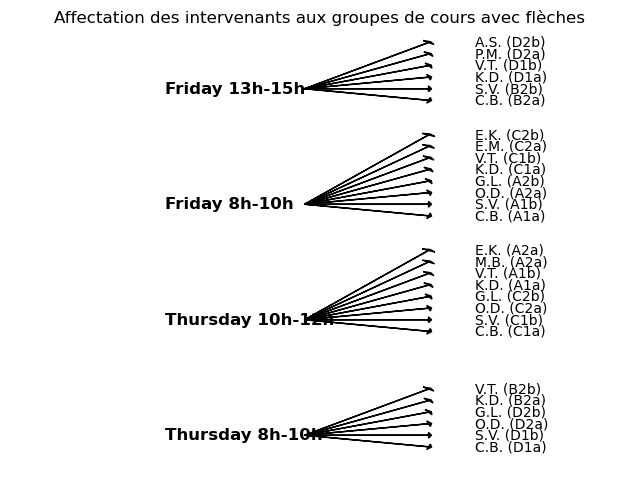

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Dictionnaire des affectations
assignments = {
    'Thursday 8h-10h': {
        'C.B.': 'D1a',
        'S.V.': 'D1b',
        'O.D.': 'D2a',
        'G.L.': 'D2b',
        'K.D.': 'B2a',
        'V.T.': 'B2b',
    },
    'Thursday 10h-12h': {
        'C.B.': 'C1a',
        'S.V.': 'C1b',
        'O.D.': 'C2a',
        'G.L.': 'C2b',
        'K.D.': 'A1a',
        'V.T.': 'A1b',
        'M.B.': 'A2a',
        'E.K.': 'A2a',
    },
    'Friday 8h-10h': {
        'C.B.': 'A1a',
        'S.V.': 'A1b',
        'O.D.': 'A2a',
        'G.L.': 'A2b',
        'K.D.': 'C1a',
        'V.T.': 'C1b',
        'E.M.': 'C2a',
        'E.K.': 'C2b',
    },
    'Friday 13h-15h': {
        'C.B.': 'B2a',
        'S.V.': 'B2b',
        'K.D.': 'D1a',
        'V.T.': 'D1b',
        'P.M.': 'D2a',
        'A.S.': 'D2b',
    }
}

# Création d'une figure
plt.figure(figsize=(8, 6))

# Position des créneaux horaires
y_positions = np.arange(len(assignments))

# Tracer les créneaux horaires
for i, (time_slot, instructors) in enumerate(assignments.items()):
    plt.text(0, y_positions[i], time_slot, fontsize=12, fontweight='bold', va='center')

    # Tracer les intervenants et les flèches
    for j, (instructor, group) in enumerate(instructors.items()):
        instructor_position = y_positions[i] + j * 0.1 - 0.1
        plt.text(1, instructor_position, f"{instructor} ({group})", fontsize=10, va='center')

        # Dessiner une flèche de chaque créneau vers les intervenants
        plt.arrow(0.45, y_positions[i], 0.4, instructor_position - y_positions[i],
                  head_width=0.05, head_length=0.01, fc='black', ec='black')

# Ajustement des axes
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, len(assignments) - 0.5)
plt.axis('off')  # Désactiver les axes pour un look plus propre
plt.title("Affectation des intervenants aux groupes de cours avec flèches")
plt.show()
